# Initialisation

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Importing necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.cluster       import KMeans, DBSCAN
from sklearn.metrics       import adjusted_rand_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy  as np
import os
# plt.style.use('dark-style.mplstyle')
plt.style.use('https://raw.githubusercontent.com/msr8/classification-project/main/style.mplstyle')
os.makedirs('assets', exist_ok=True)

# Defining constants
DATASET_FP    = 'https://raw.githubusercontent.com/msr8/classification-project/main/breast-cancer-wisconsin.csv'
ATTRS         = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
                  'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
LABEL         = 'Class'
KS            = [2,11]   # First element is included, second is not
SAMPLES       = [1,11]   # First element is included, second is not
EPS           = [0.1, 3] # First and seond element are included
EPS_NUM       = 29
ROUND_FACTOR  = 3
RAND_STATE    = 42

# Loading dataset
data = pd.read_csv(DATASET_FP)
# Print info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    object
dtypes: int64(9), object(2)
memory usage: 60.2+ KB
None


<br>

# Preprocessing

In [2]:
# The missing values are represented with '?', replacing them with NA
data.replace('?', pd.NA, inplace=True)
# Since there are only 16 rows in the dataset with missing values, we can drop them
data.dropna(inplace=True)

# In the class column, replacing 'benign' with 0 and 'malignant' with 1
data['Class'].replace('benign',    0, inplace=True)
data['Class'].replace('malignant', 1, inplace=True)
# Since all values in the dataframe can be represented as integers, converting them
data = data.astype(int)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB
None


<br>

# Splitting data

In [3]:
# Splitting data into x and y
X = data[ATTRS]
Y = data[LABEL]

<br>

# K-Means

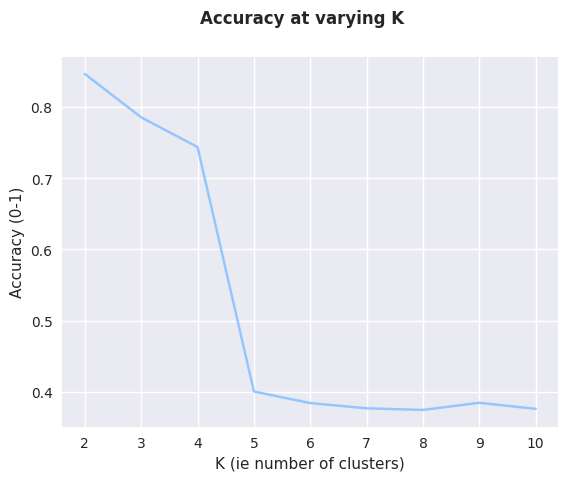

Lowest accuracy:  0.3744348767262089
Highest accuracy: 0.8464675664733539


In [4]:
accuracies = {}

for k in range(*KS):
    # Creating the KMeans model
    kmeans = KMeans(n_clusters=k, random_state=RAND_STATE)
    # Training it
    kmeans.fit(X)
    # Calculating the accuracy
    accuracy = adjusted_rand_score(Y, kmeans.labels_)
    # Storing it in our dict
    accuracies[k] = accuracy

# Plotting our findings and displaying them
plt.suptitle('Accuracy at varying K')
plt.xlabel('K (ie number of clusters)')
plt.ylabel('Accuracy (0-1)')
plt.plot(accuracies.keys(), accuracies.values())
plt.savefig('assets/kmeans.png')
plt.show()
# Displaying lowest and highest accuracy
print(f'Lowest accuracy:  {min(accuracies.values())}\nHighest accuracy: {max(accuracies.values())}')

As we can see, the accuracy keeps decreasing as `k` decreases

<br>

# DBSCAN

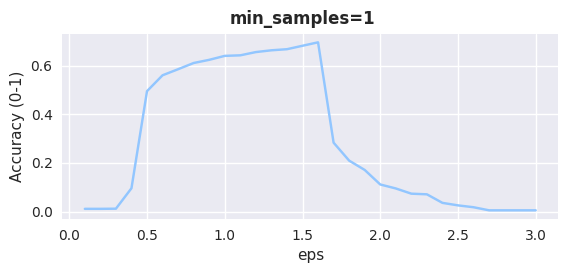

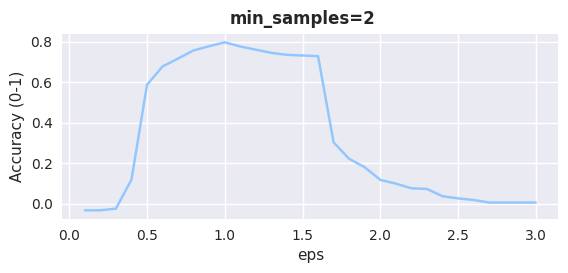

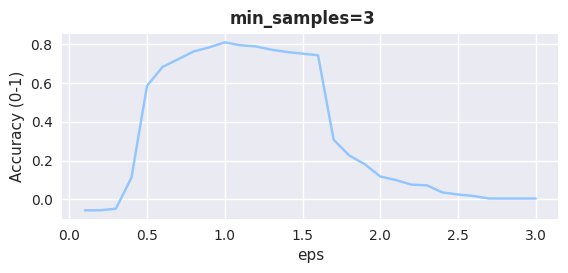

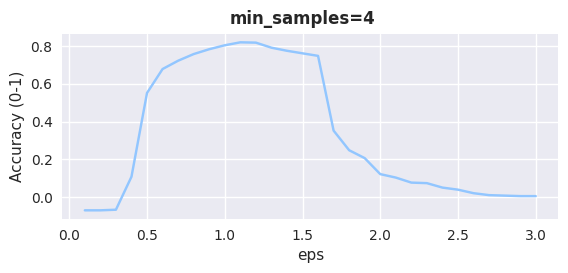

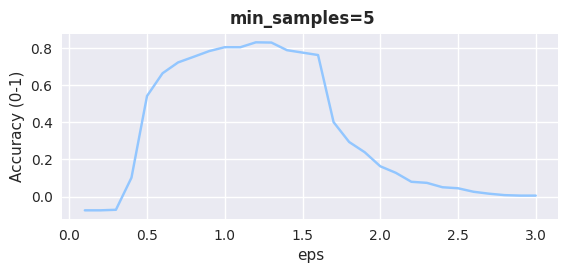

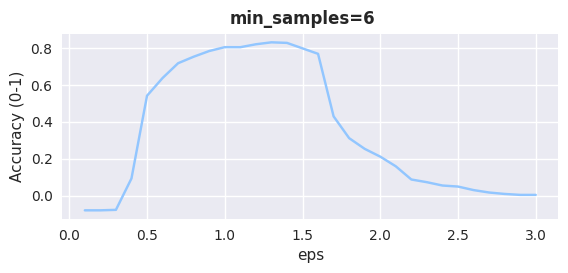

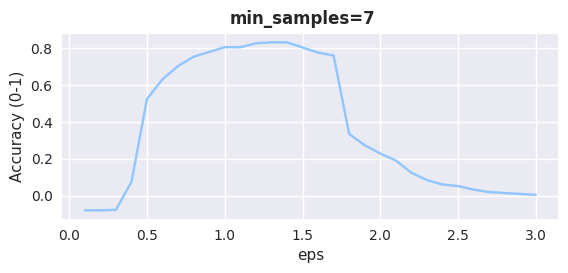

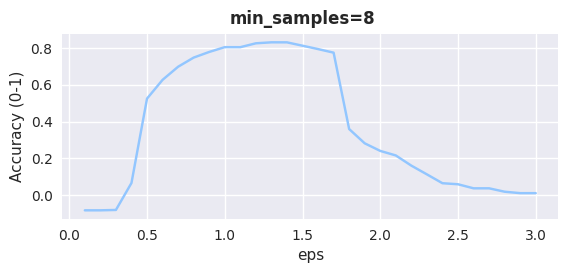

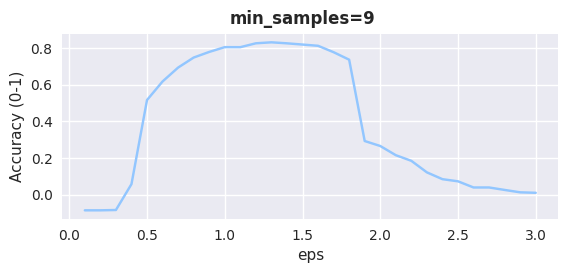

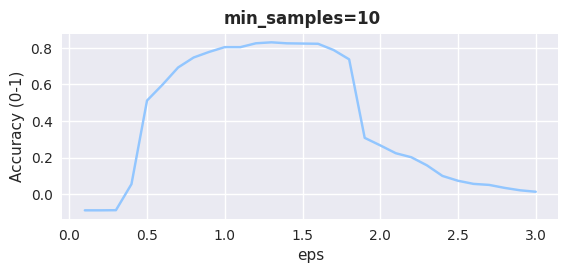

Lowest accuracy: -0.08907345029539228
Highest accuracy: 0.8308771106723971


In [5]:
# Scaling X
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

accuracies  = {}

for samples in range(*SAMPLES):
    accuracies[samples] = {}
    for ep in np.linspace(*EPS, EPS_NUM):
        ep = round(ep, 1)
        # Creating the DBSCAN model
        dbscan = DBSCAN(eps=ep, min_samples=samples)
        # Training it on the scaled data
        dbscan.fit(X_scaled)
        # Caclulating the accuracy
        accuracy = adjusted_rand_score(Y, dbscan.labels_)
        # Storing it in our dict
        accuracies[samples][ep] = accuracy

# Plotting our findings and displaying them
# num_samples = len(accuracies)
# fig, axs    = plt.subplots(num_samples, figsize=(10,7*num_samples))

for key in accuracies:
    dic = accuracies[key]
    plt.figure().set_figheight(2.4) # Defaul height is 4.8
    plt.suptitle(f'min_samples={key}')
    plt.ylabel('Accuracy (0-1)')
    plt.xlabel('eps')
    plt.plot(dic.keys(), dic.values())
    plt.savefig(f'assets/dbscan-{key}.png', bbox_inches='tight')
    plt.show()

# plt.savefig('assets/dbscan.png', bbox_inches='tight') #bbox_inches to remove big top and bottom margins
# plt.show()

# Displaying lowest and highest accuracy
accuracies_list = [i for inner_dict in accuracies.values() for i in inner_dict.values()]
print(f'Lowest accuracy: {min(accuracies_list)}\nHighest accuracy: {max(accuracies_list)}')

<br>

<br>